1\. **Pandas DataFrame**

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every `x` BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [ ]:
# If haven't downloaded it yet, please get the data file with wget
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv 

data = pd.read_csv('data/data_000637.txt').head(12000) 
print(data) 
print(data.info()) 

       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0         1     0          123  3869200167        2374        26
1         1     0          124  3869200167        2374        27
2         1     0           63  3869200167        2553        28
3         1     0           64  3869200167        2558        19
4         1     0           64  3869200167        2760        25
5         1     0           63  3869200167        2762         4
6         1     0           61  3869200167        2772        14
7         1     0          139  3869200167        2776         0
8         1     0           62  3869200167        2774        21
9         1     0           60  3869200167        2788         7
10        1     1            7  3869200167        2785         4
11        1     0           64  3869200167        2786        19
12        1     1            6  3869200167        2792        18
13        1     0           36  3869200167        2791        23
14        1     0        

2\. Estimate the number of BX in a ORBIT (the value `x`).

*Hint*: check when the BX counter reaches the maximum value before being reset to 0.

In [30]:
bx = data["BX_COUNTER"]
est_bx = max(bx)
print("Estimated number of BX in a ORBIT:", est_bx)

Estimated number of BX in a ORBIT: 3563


3\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition, and convert the new column to a Time Series.

In [31]:
data["abs_time_in_ns"] = data['TDC_MEAS'].transform(lambda x: x * 25/30) + data['BX_COUNTER'].transform(lambda x: x * 25) +data['ORBIT_CNT'].transform(lambda x: x * est_bx * 25)
data

HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0         1     0          123  3869200167        2374        26   
1         1     0          124  3869200167        2374        27   
2         1     0           63  3869200167        2553        28   
3         1     0           64  3869200167        2558        19   
4         1     0           64  3869200167        2760        25   
5         1     0           63  3869200167        2762         4   
6         1     0           61  3869200167        2772        14   
7         1     0          139  3869200167        2776         0   
8         1     0           62  3869200167        2774        21   
9         1     0           60  3869200167        2788         7   
10        1     1            7  3869200167        2785         4   
11        1     0           64  3869200167        2786        19   
12        1     1            6  3869200167        2792        18   
13        1     0           36  3869200167        2791        23   
14        1     0           56  3869200167        2789         3   
15        1     1          139  3869200167        2797         0   
16        1     1            8  3869200167        2787        14   
17        1     0           63  3869200167        2790        10   
18        1     1            5  3869200167        2795         4   
19        1     0           53  3869200167        2796        26   
20        1     1           10  3869200167        2789        14   
21        1     0           57  3869200167        2789        10   
22        1     0           61  3869200167        2790        23   
23        1     0           38  3869200167        2799        15   
24        1     0           58  3869200167        2795        19   
25        1     0           62  3869200167        2797        14   
26        1     0           59  3869200167        2799        14   
27        1     0           59  3869200167        3081        21   
28        1     0           61  3869200167        3081         1   
29        1     0           60  3869200167        3083        20   
30        1     0          139  3869200167        3085         0   
31        1     0           62  3869200167        3079         4   
32        1     0           61  3869200167        3085        25   
33        1     0           54  3869200167        3134         4   
34        1     0           53  3869200167        3136        25   
35        1     0           51  3869200167        3146        20   
36        1     0           59  3869200167        3176         8   
37        1     0           53  3869200167        3181         8   
38        1     0           60  3869200167        3175        17   
39        1     0          139  3869200167        3186         0   
40        1     0           54  3869200167        3184        28   
41        1     0           56  3869200167        3177        20   
42        1     0           57  3869200167        3187        17   
43        1     1            1  3869200168           7        18   
44        1     0           64  3869200168           7        16   
45        1     1            1  3869200168          13        18   
46        1     0           63  3869200168           8        28   
47        1     1            2  3869200168          17        26   
48        1     0          139  3869200168          23         0   
49        1     0           61  3869200168          18        17   
50        1     0           62  3869200168          21         9   
51        1     0           61  3869200168          77        26   
52        1     0           62  3869200168          76        21   
53        1     0           63  3869200168          81        17   
54        1     1           61  3869200168         260        16   
55        1     1           59  3869200168         270        21   
56        1     1          139  3869200168         272         0   
57        1     1           62  3869200168         263        2

4\. Find out the duration of the data taking in hours, minutes and seconds, by using the features of the Time Series. Perform this check reading the whole dataset.

In [32]:
import datetime as dt

itime = dt.datetime.now()
print("Begin time:", itime)

time =  data['TDC_MEAS'] *(25/30) + data['BX_COUNTER'] * 25 + data['ORBIT_CNT']*est_bx*25

ftime = dt.datetime.now()
print("End time:", ftime)
print("Elapsed time:", (ftime - itime))

Begin time: 2022-11-25 10:40:50.591329
End time: 2022-11-25 10:40:50.594180
Elapsed time: 0:00:00.002851


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [33]:
grouped =  data.groupby('TDC_CHANNEL').sum().sort_values(by = ['HEAD']).iloc[-3:]
grouped

HEAD  FPGA      ORBIT_CNT  BX_COUNTER  TDC_MEAS  abs_time_in_ns
TDC_CHANNEL                                                                 
63            600     4  2321520136839     1111114      9033    2.067894e+17
64            609    15  2356342939847     1136672      8774    2.098912e+17
139          1025   315  3965930231950     1815251         0    3.532652e+17

6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit).

In [34]:
count = data.ORBIT_CNT.unique().size
print("The number of non empty orbits is: " + str(count))

The number of non empty orbits is: 120


7\. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [35]:
L=139.
unique_orbits = pd.DataFrame(data[data['TDC_CHANNEL'] == 139]).drop_duplicates(subset=['ORBIT_CNT'], inplace=False)
print("\nThe number of unique orbits with at least one measurement from TDC_CHANNEL == 139 is:", len(unique_orbits))


The number of unique orbits with at least one measurement from TDC_CHANNEL == 139 is: 120


8\. Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.

In [36]:
FPGA_0 = pd.Series(data[data['FPGA'] == 0]['TDC_CHANNEL'].value_counts())
FPGA_1 = pd.Series(data[data['FPGA'] == 1]['TDC_CHANNEL'].value_counts())
print("Series FPGA == 0 :\n" , FPGA_0)
print("\nSeries FPGA == 1 :\n" , FPGA_1)

Series FPGA == 0 :
 139    710
63     596
64     594
61     448
62     423
60     408
59     363
58     304
57     297
56     284
54     224
53     208
123    169
124    155
51     152
50     152
48     143
49     134
47     119
44     112
46     111
43     101
45     101
42      87
40      86
38      76
41      73
36      64
28      61
122     61
37      57
121     54
32      52
24      51
26      42
35      42
31      40
20      39
119     38
120     38
29      34
33      31
117     31
22      29
23      29
27      28
8       28
25      26
18      26
88      25
19      24
118     24
89      23
16      23
87      22
85      22
116     21
82      21
17      20
84      19
115     19
92      18
21      18
10      18
111     17
90      17
7       17
96      16
114     16
72      16
94      15
81      15
86      15
6       15
15      15
91      14
83      14
113     14
11      14
5       13
71      13
112     13
80      13
74      12
93      12
4       12
13      12
79      11
2       10
7

9\. **Optional:** Create two histograms (one for each FPGA) that show the number of counts for each TDC channel.

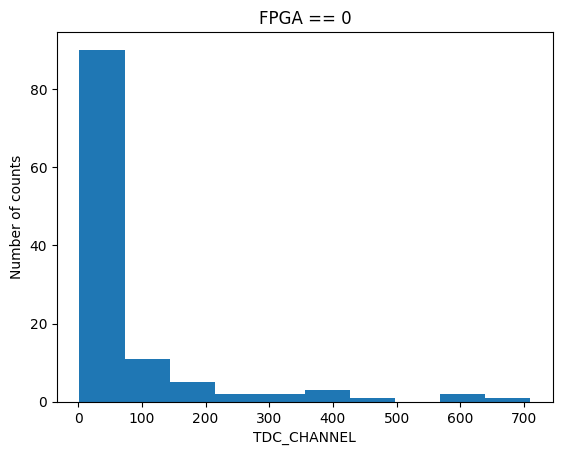

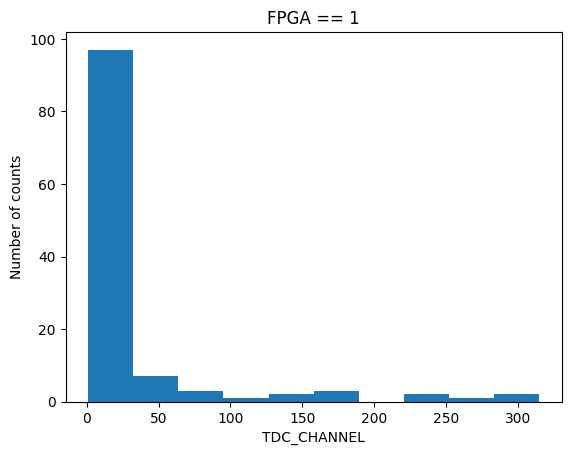

In [37]:
plt.hist(FPGA_0)
plt.title('FPGA == 0')
plt.xlabel('TDC_CHANNEL')
plt.ylabel('Number of counts')
plt.show()
print("\n\n\n")
plt.hist(FPGA_1)
plt.title('FPGA == 1')
plt.xlabel('TDC_CHANNEL')
plt.ylabel('Number of counts')
plt.show()

